In [1]:
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *
import pandas as pd
from siuba import *
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [2]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18


 ## First steps

In [3]:
mpg.shape


(234, 11)

In [4]:
mpg.head()


manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

 ### Exercise

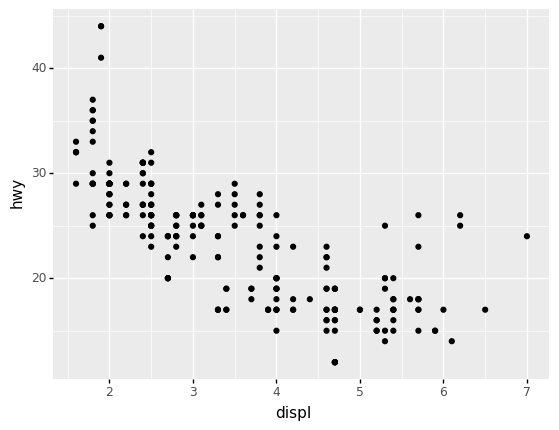

<ggplot: (8737649886901)>

In [5]:
(
ggplot(
    data=mpg, 
    mapping=aes(x='displ', y='hwy')) + 
    geom_point()
)


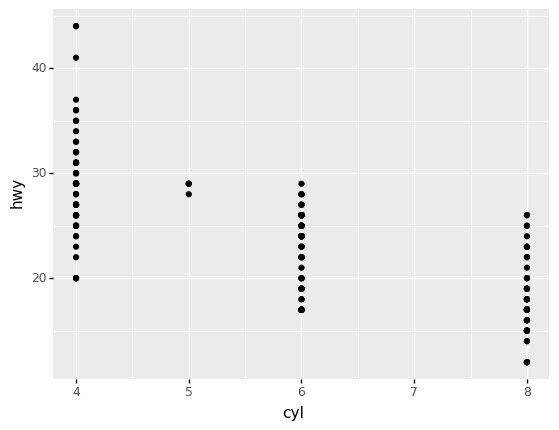

<ggplot: (8737548585882)>

In [6]:
(
ggplot(
    data=mpg, 
    mapping=aes(x='cyl', y='hwy')) + 
    geom_point()
)


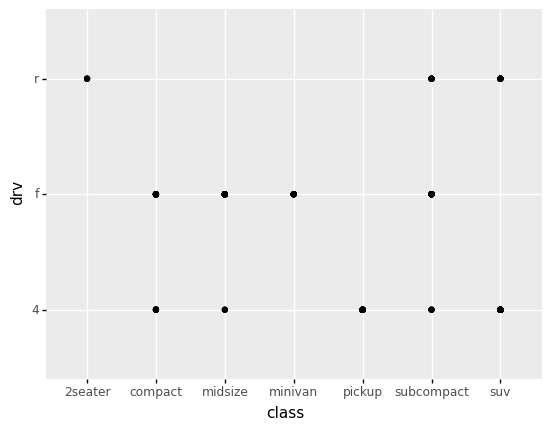

<ggplot: (8737649882688)>

In [7]:
(
ggplot(
    data=mpg, 
    mapping=aes(x='class', y='drv')) + 
    geom_point()
)


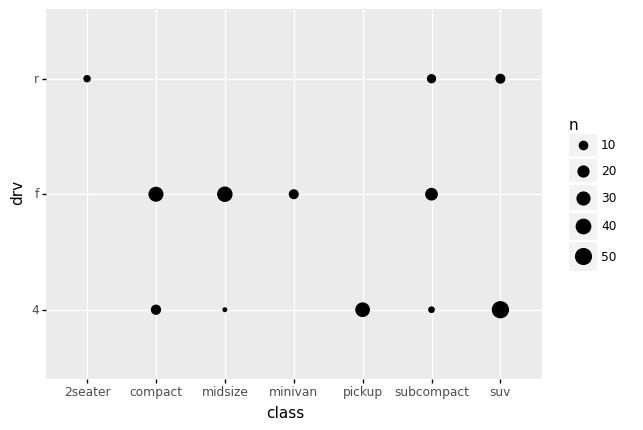

<ggplot: (8737540143517)>

In [8]:
(
ggplot(
    data=mpg, 
    mapping=aes(x='class', y='drv')) + 
    geom_count()
)


In [9]:
mpg_count = (
    mpg >> 
    count('class', 'drv') >>
    rename(count = 'n')
)
mpg_count

class drv  count
0      2seater   4      0
1      2seater   f      0
2      2seater   r      5
3      compact   4     12
4      compact   f     35
5      compact   r      0
6      midsize   4      3
7      midsize   f     38
8      midsize   r      0
9      minivan   4      0
10     minivan   f     11
11     minivan   r      0
12      pickup   4     33
13      pickup   f      0
14      pickup   r      0
15  subcompact   4      4
16  subcompact   f     22
17  subcompact   r      9
18         suv   4     51
19         suv   f      0
20         suv   r     11

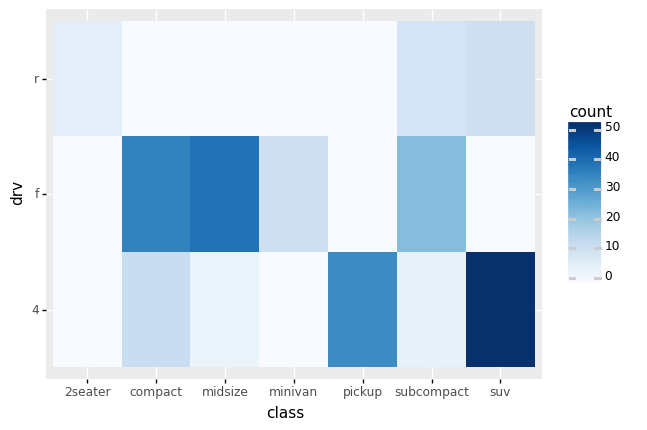

<ggplot: (8737538487872)>

In [11]:
(
ggplot(
       data=mpg_count,
       mapping=aes(x='class', y='drv', fill='count')) + 
       geom_tile() + 
       scale_fill_cmap('Blues')
)


 ## Aesthetic mappings

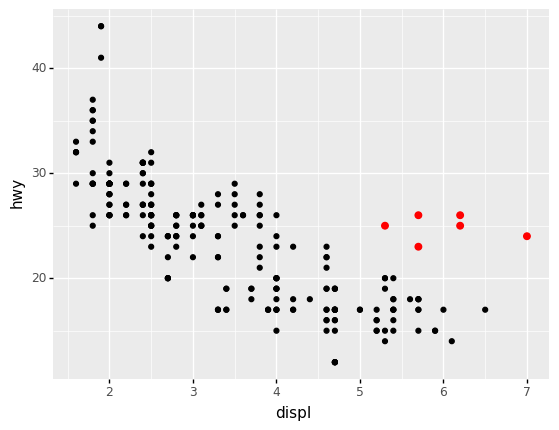

<ggplot: (8737540098027)>

In [12]:
(
ggplot(
    mapping=aes(x='displ', y='hwy')) +
    geom_point(data=mpg) + 
    geom_point(
        data=mpg.query('displ > 5 and hwy > 20'), 
        color="red", size=2.2)
)


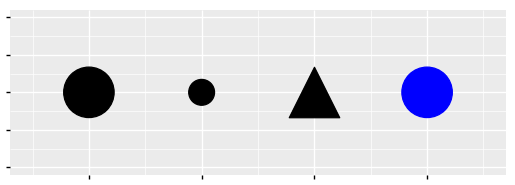

<ggplot: (8737701574271)>

In [39]:
def no_labels(x) :
    return [""] * len(x)
  
df = pd.DataFrame({"x": [1, 2, 3, 4],
                   "y": [1, 1, 1, 1],
                   "size": [20, 10, 20, 20],
                   "shape": ["o", "o", "^", "o"],
                   "color": ["black", "black", "black", "blue"]})
(
ggplot(
    data=df, 
    mapping=aes(x="x", y="y", 
    size="size", shape="shape", color="color")) +
    geom_point() +
    scale_x_continuous(limits=(0.5, 4.5), labels=no_labels) +
    scale_y_continuous(limits=(0.9, 1.1), labels=no_labels) +
    scale_size_identity() +
    scale_shape_identity() +
    scale_color_identity() +
    labs(x=None, y=None) +
    theme(aspect_ratio=1/3)
)

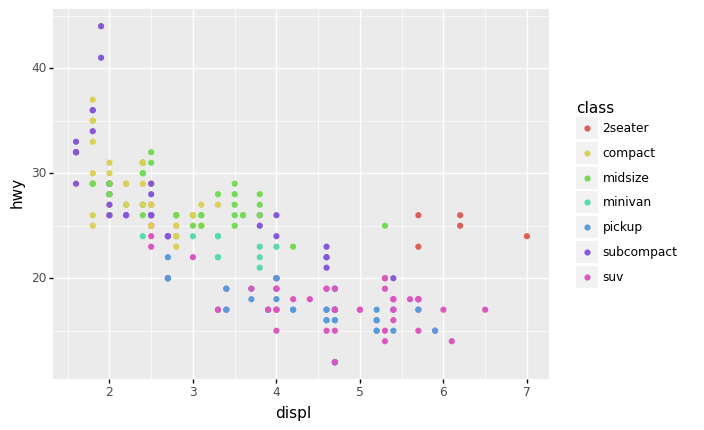

<ggplot: (8737540089085)>

In [13]:
(
ggplot(
    data=mpg, 
    mapping=aes(x='displ', y='hwy', color='class')) + 
    geom_point()
)


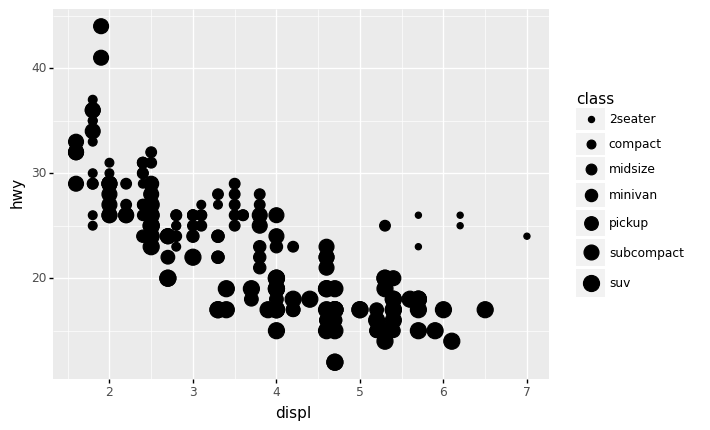

<ggplot: (8737540093727)>

In [14]:
(
ggplot(
    data=mpg, 
    mapping=aes(x='displ', y='hwy', size='class')) +
    geom_point()
)


In [15]:
p1 = (
        ggplot(
            data=mpg, 
            mapping=aes(x='displ', y='hwy', alpha='class')) + 
            geom_point()
     )


In [16]:
p2 = (
        ggplot(
            data=mpg, 
            mapping=aes(x='displ', y='hwy', shape='class')) + 
            geom_point()
     )
        

 ### PlotNine can not plot legends separately due to Matplotlib's awful grid management

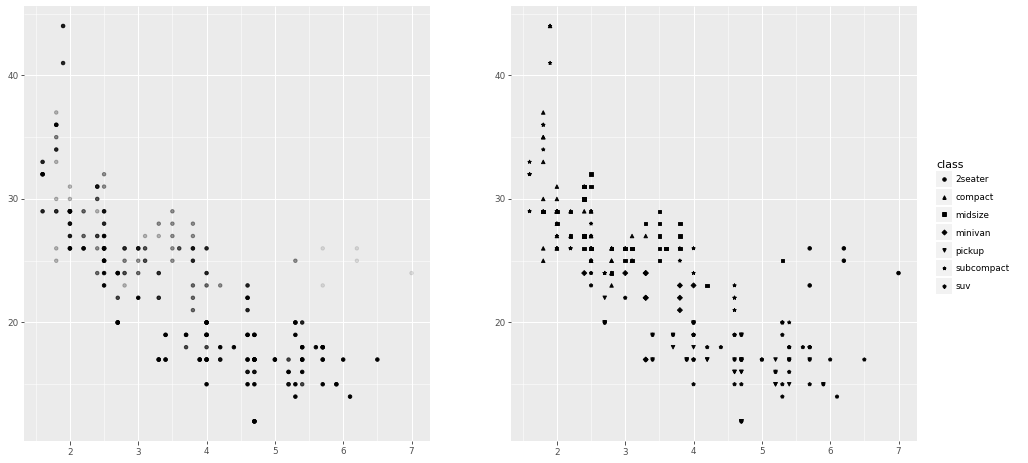

<ggplot: (8737538317005)>

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig._themeable = {}

p1._draw_using_figure(fig, [axes[0]])
p2._draw_using_figure(fig, [axes[1]])


 ### Exercise

In [18]:
# ggplot(data=mpg, mapping=aes(x='displ', y='hwy'), color='blue') + geom_point()


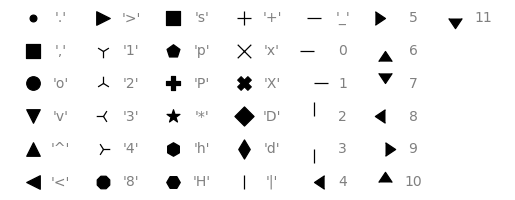

<ggplot: (8737695279379)>

In [40]:
shapes = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"] + list(range(12))
labels = ["'" + s + "'" for s in shapes[:25]] + [str(s) for s in range(12)]
df_shapes = pd.DataFrame({"x": [x // 6 for x in range(len(shapes))],
                          "y": [-(y % 6) for y in range(len(shapes))],
                          "shape": shapes,
                          "label": labels})
(
ggplot(
    data=df_shapes, 
    mapping=aes("x", "y", shape="shape")) +
    geom_point(size=5) + 
    geom_text(
        mapping=aes(label="label"), 
        nudge_x=0.4, size=10, color='grey') +
    scale_shape_identity() +
    theme_void() +
    theme(aspect_ratio=1/2.75)
)

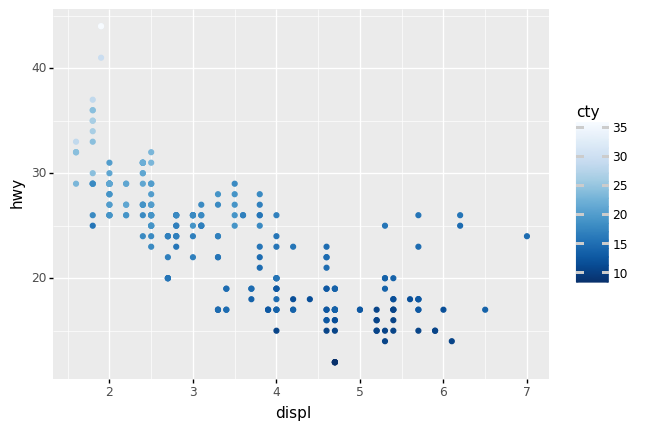

<ggplot: (8737548562833)>

In [19]:
(
ggplot(
       data=mpg, 
       mapping=aes(x='displ', y='hwy', color='cty')) +
       geom_point() +
       scale_color_cmap('Blues_r')
)


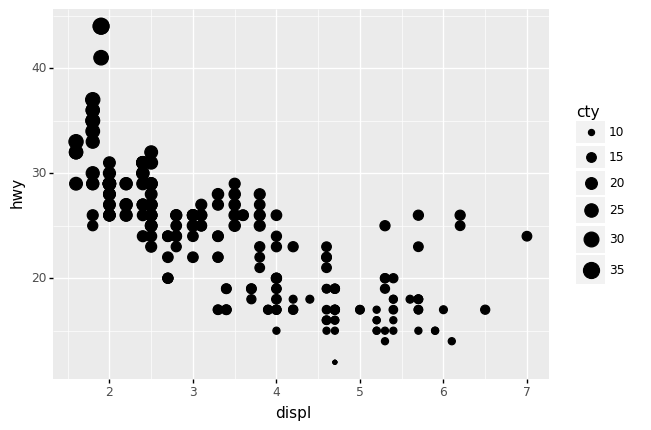

<ggplot: (8737538327034)>

In [20]:
(
ggplot(
    data=mpg, 
    mapping=aes(x='displ', y='hwy', size='cty')) +
    geom_point()
)


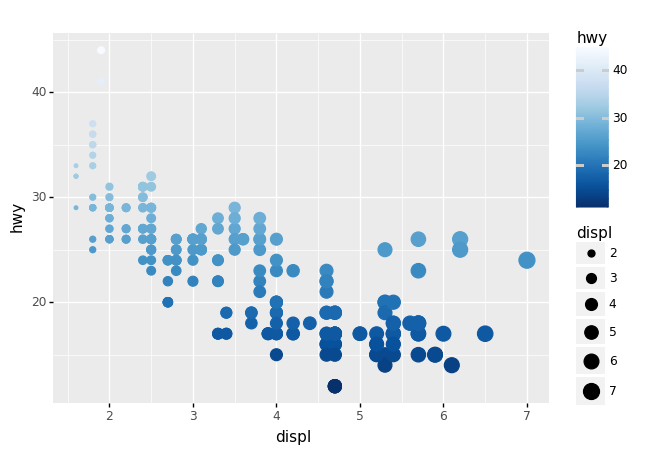

<ggplot: (8737538486989)>

In [21]:
(
ggplot(
       data=mpg,
       mapping=aes(x='displ', y='hwy', color='hwy', size='displ')) + 
       geom_point() +
       scale_color_cmap('Blues_r')
)


In [4]:
mtcars.shape


(32, 12)

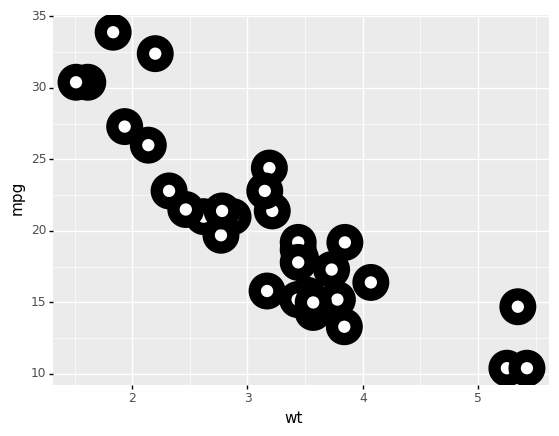

<ggplot: (8737538463907)>

In [22]:
(
ggplot(
    data=mtcars, 
    mapping=aes(x='wt', y='mpg')) + 
    geom_point(color="black", fill="white", size=5, stroke=5)
)


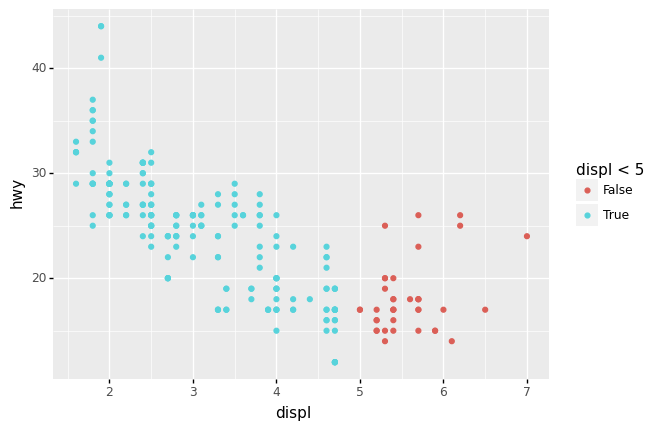

<ggplot: (8789628830365)>

In [9]:
(
ggplot(
    data=mpg, 
    mapping=aes(x='displ', y='hwy', color='displ < 5')) + 
    geom_point()
)

 ## Facets

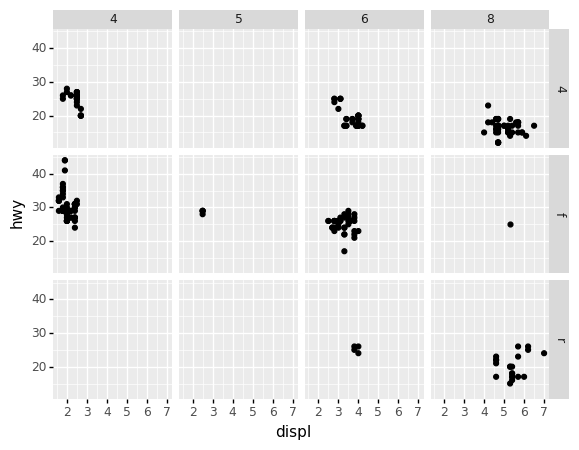

<ggplot: (8737538461769)>

In [23]:
(
ggplot(data=mpg) + 
    geom_point(mapping=aes(x='displ', y='hwy')) + 
    facet_grid('drv ~ cyl')
)


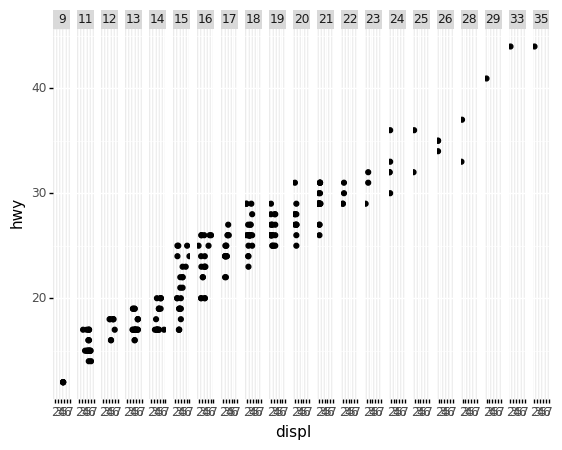

<ggplot: (8789627210716)>

In [11]:
(
ggplot(
    data=mpg, 
    mapping=aes(x='displ', y='hwy')) + 
    geom_point() +
    facet_grid('. ~ cty')
)


### Exercise

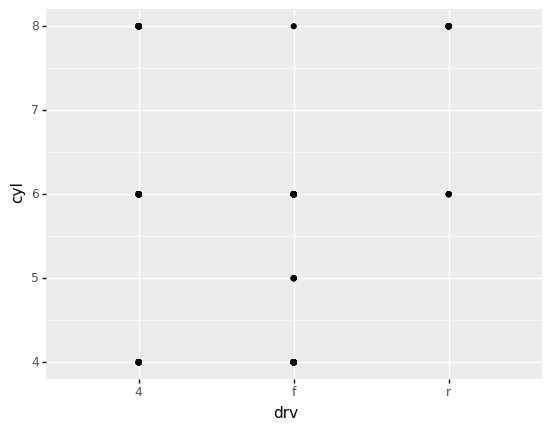

<ggplot: (8737711840073)>

In [6]:
(
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = 'drv', y = 'cyl'))
)

### The empty cells (facets) in this plot have no observations.

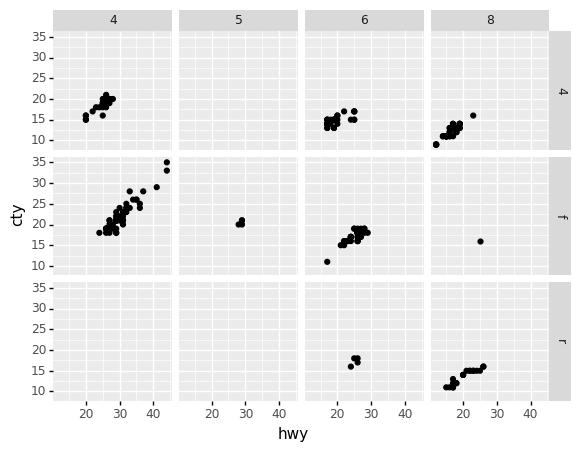

<ggplot: (8737701758461)>

In [8]:
(
ggplot(data = mpg) +
  geom_point(mapping = aes(x = 'hwy', y = 'cty')) +
  facet_grid('drv ~ cyl')
)

### facet by values on the y-axis.

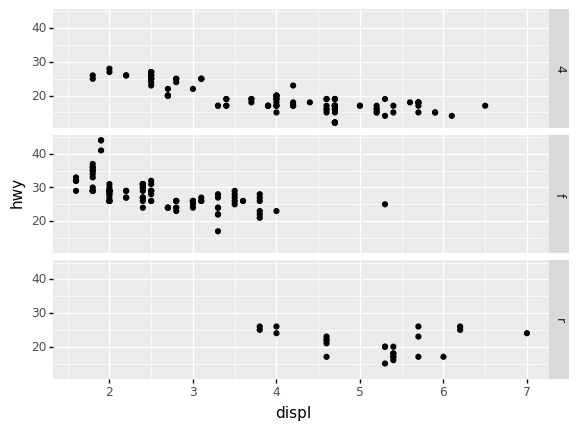

<ggplot: (8737701769569)>

In [9]:
(
ggplot(data = mpg) +
  geom_point(mapping = aes(x = 'displ', y = 'hwy')) +
  facet_grid('drv ~ .')
)

### facet by values on the x-axis.

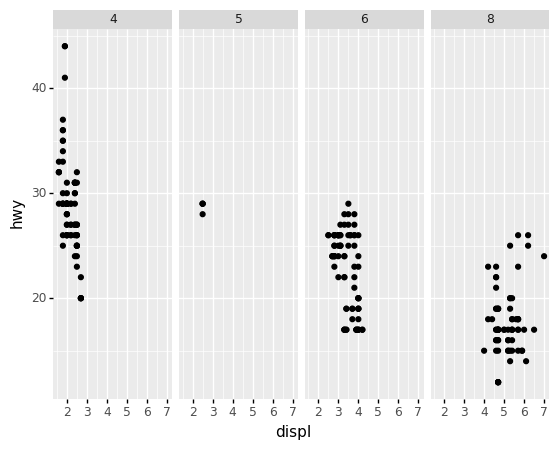

<ggplot: (8737701420701)>

In [10]:
(
ggplot(data = mpg) +
  geom_point(mapping = aes(x = 'displ', y = 'hwy')) +
  facet_grid('. ~ cyl')
)

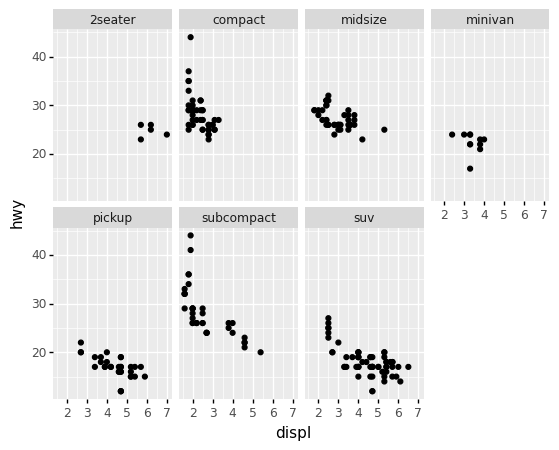

<ggplot: (8737701292108)>

In [11]:
(
ggplot(data = mpg) +
  geom_point(mapping = aes(x = 'displ', y = 'hwy')) +
  facet_wrap('~class', nrow = 2)
)

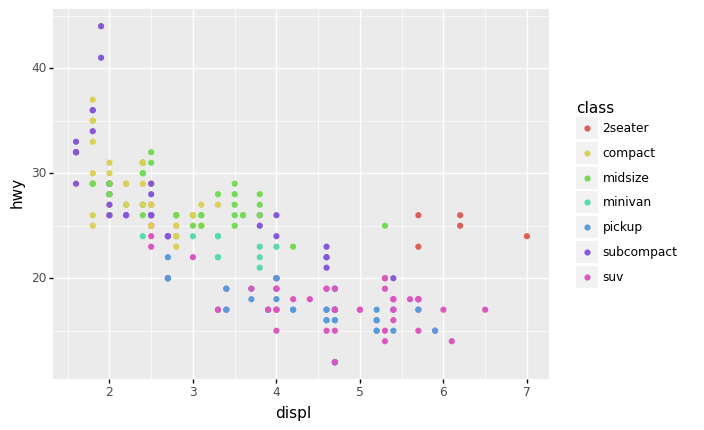

<ggplot: (8737701088437)>

In [12]:
(
ggplot(data = mpg) +
  geom_point(mapping = aes(x = 'displ', y = 'hwy', color = 'class'))
)

## Geometric objects

In [19]:
p1 = (
    ggplot(
        data = mpg, 
        mapping = aes(x = 'displ', y = 'hwy')) + 
        geom_point()
)

In [43]:
p2 = (
    ggplot(
        data = mpg, 
        mapping = aes(x = 'displ', y = 'hwy')) + 
        geom_smooth()
)

<ggplot: (8737695087364)>

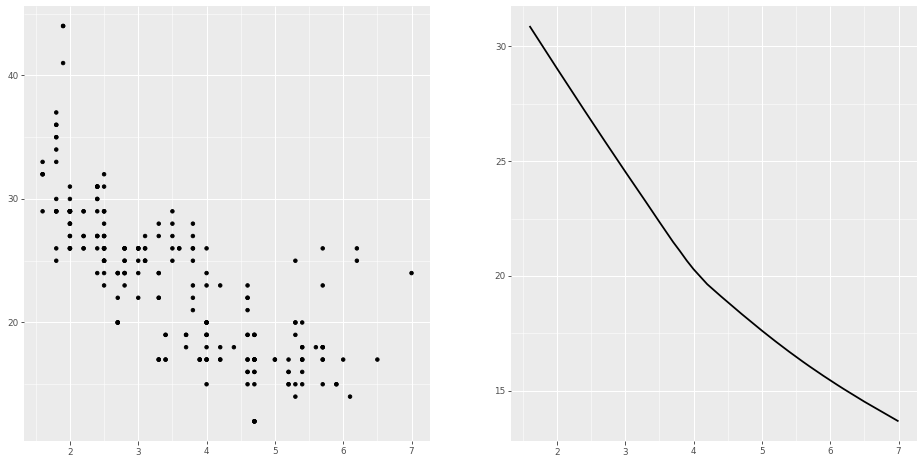

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig._themeable = {}

p1._draw_using_figure(fig, [axes[0]])
p2._draw_using_figure(fig, [axes[1]])

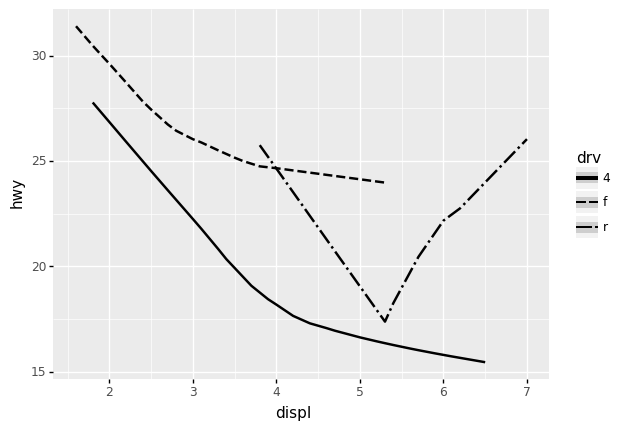

<ggplot: (8737695022288)>

In [45]:
(
ggplot(
    data = mpg, 
    mapping = aes(x = 'displ', y = 'hwy')) + 
    geom_smooth(mapping = aes(linetype = 'drv'))
)